### PROYECTO EVALUACION DE TIEMPO DE ENTREGA EN COMERCIO ELECTRONICO
📦 Evaluar los tiempos de entrega en una tienda online es crucial, ya que los retrasos pueden afectar la experiencia del cliente y, en consecuencia, la reputación y las ventas de la empresa. Un servicio de entrega eficiente 🚀 mejora la satisfacción del cliente, fomenta la lealtad y reduce la tasa de cancelaciones. Además, identificar patrones en los retrasos permite optimizar la logística y minimizar costos operativos.

💡 Por ello, elegí este proyecto, ya que me permitirá familiarizarme con el análisis de datos aplicado a problemas reales en el e-commerce. A través de este estudio, podré desarrollar habilidades en manipulación de datos, visualización y generación de insights para la toma de decisiones empresariales. Para ello, se explorarán los datos disponibles, identificando patrones en los retrasos 📊 y comparando los tiempos estimados con los tiempos reales de entrega. También se analizarán factores como el tipo de envío, la región y la categoría de los productos para determinar posibles causas de retrasos.

🛠️ Para este análisis, se utilizarán librerías de Python como pandas para la manipulación de datos, matplotlib y seaborn para la visualización de tendencias 📉, y numpy para cálculos estadísticos. A través de estas herramientas, se generarán gráficos y métricas clave que permitirán obtener insights sobre la eficiencia del proceso logístico y proponer recomendaciones para mejorar el servicio de entrega.

1️⃣ Carga de datos 📂: Se importará el conjunto de datos y se explorará su estructura para comprender sus variables y verificar su calidad.

2️⃣ Limpieza de datos 🧼: Se identificarán y tratarán valores nulos, duplicados e inconsistencias en las variables clave para asegurar que el análisis sea preciso.

3️⃣ Análisis exploratorio de datos (EDA) 🔍📊: Se examinarán las distribuciones de los tiempos de entrega, las diferencias entre los tiempos programados y reales, y otros factores que puedan influir en los retrasos.

4️⃣ Formulación y prueba de hipótesis 📈🤔: Se plantearán hipótesis sobre las posibles causas de los retrasos y se validarán con herramientas estadísticas.

5 Conclusiones y recomendaciones 🏁💡: Se sintetizarán los principales insights obtenidos y se propondrán estrategias para optimizar los tiempos de entrega en el e-commerce.



##### CARGA DE LIBRERIAS 

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy import stats

##### Carga de dataset

In [3]:
#Se carga el dataset, y se imprime para ver el estado de los datos
data_commerce= pd.read_csv(r"C:\Users\andre\Documents\ANALISTA DE DATOS\PROYECTO ACELERADOR\archive(2)\Ecommerce_data.csv")
data_commerce.info() 

#Se comprueba los valores duplcicados 
duplicados = data_commerce.duplicated().sum()
print(f"El número de filas duplicadas es: {duplicados}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113270 entries, 0 to 113269
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_id                  113270 non-null  object 
 1   customer_first_name          113270 non-null  object 
 2   customer_last_name           113270 non-null  object 
 3   category_name                113270 non-null  object 
 4   product_name                 113270 non-null  object 
 5   customer_segment             113270 non-null  object 
 6   customer_city                113270 non-null  object 
 7   customer_state               113270 non-null  object 
 8   customer_country             113270 non-null  object 
 9   customer_region              113270 non-null  object 
 10  delivery_status              113270 non-null  object 
 11  order_date                   113270 non-null  object 
 12  order_id                     113270 non-null  object 
 13 

Como se puede ver existe un total de 21 columnas , las cuales existen tipos de datos objeto , enteros y flotante. Ademas es importante destacar que para este dataset , no existen valores nulos ni valores duplicados , por lo que los datos se encuentran limpios para ser analizados.


In [4]:
#se obtiene una informacion basica estadistica para futuro analisis 
data_commerce.describe()

,days_for_shipment_scheduled,days_for_shipment_real,order_item_discount,sales_per_order,order_quantity,profit_per_order
count,113270.000000,113270.000000,113270.000000,113270.000000,113270.000000,113270.000000
mean,2.931209,3.464006,21.105465,204.499537,1.967564,23.069382
std,1.375914,1.632198,22.959207,141.443090,1.355254,105.288561
min,0.000000,0.000000,0.000000,9.990000,1.000000,-3366.000000
25%,2.000000,2.000000,5.500000,119.980003,1.000000,7.200000
50%,4.000000,3.000000,14.400000,199.919998,1.000000,32.029999
75%,4.000000,5.000000,30.000000,299.950012,3.000000,65.570000
max,4.000000,6.000000,500.000000,1999.989990,5.000000,2600.000000


##### DISTRIBUCION DE TIEMPOS DE ENTREGA

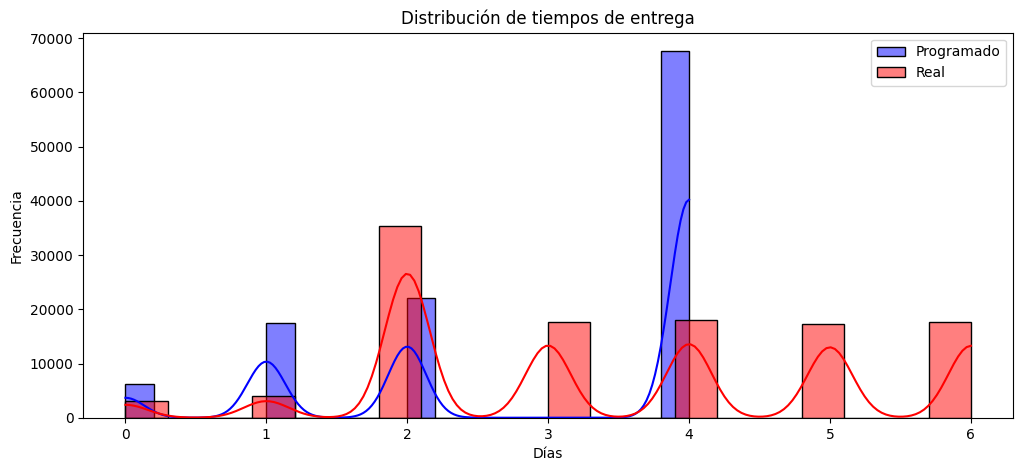

In [5]:
#Se usa la libreria seaborn para poder graficar historigramas que definan la distribucion de los tiempos de entrega
plt.figure(figsize=(12, 5))  
sns.histplot(data_commerce['days_for_shipment_scheduled'], bins=20, kde=True, label='Programado', color='blue')  
sns.histplot(data_commerce['days_for_shipment_real'], bins=20, kde=True, label='Real', color='red')  
plt.legend()  
plt.title('Distribución de tiempos de entrega')  
plt.xlabel('Días')  
plt.ylabel('Frecuencia')  
plt.show()

La gráfica muestra la distribución de los tiempos de entrega programados y reales en una tienda online, revelando discrepancias significativas. Se observa que los tiempos reales de entrega tienden a retrasarse en comparación con los programados, con una mayor dispersión en los días posteriores. El pico en el día 4 sugiere una alta concentración de entregas programadas, mientras que las entregas reales están más distribuidas. Esto indica posibles ineficiencias en la logística, lo que podría afectar la experiencia del cliente y requerir optimización en la planificación de envíos.

In [6]:
#Analizando cuantos dias fueron retrasados
data_commerce['shipment_delay'] = data_commerce['days_for_shipment_real'] - data_commerce['days_for_shipment_scheduled']

In [7]:

data_commerce['shipment_delay'].describe()

count    113270.000000
mean          0.532798
std           1.513507
min          -3.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: shipment_delay, dtype: float64

La mayoría de los pedidos tienen un retraso promedio de 0.53 días, con una mediana de 1 día.
El 75 % de los pedidos llegan con 0 a 1 día de retraso, pero algunos llegan hasta 3 días antes o 4 días después.
Hay una alta variabilidad en los tiempos de entrega (desviación estándar de 1.51 días), lo que indica la presencia de retrasos extremos.
Se recomienda analizar los tipos de envío y visualizar la distribución de los retrasos para identificar patrones.

### Visualizacion de retrasos por categoria

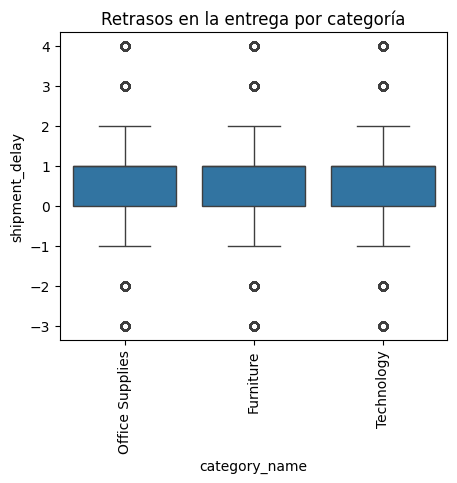

In [16]:
#Con una grafica de bigotes se analiza si existen retrasos por categoria
plt.figure(figsize=(5, 4))  
sns.boxplot(x='category_name', y='shipment_delay', data=data_commerce)  
plt.xticks(rotation=90)  
plt.title('Retrasos en la entrega por categoría')  
plt.show()

La gráfica de cajas representa los retrasos en la entrega según la categoría del producto (Office Supplies, Furniture y Technology). Se observa que la mayoría de los envíos se entregan en el tiempo estimado o con ligeras variaciones, ya que la mediana está cerca de cero en todas las categorías. Sin embargo, hay valores atípicos que indican algunos pedidos con retrasos significativos o entregas adelantadas. Este comportamiento sugiere que, aunque el sistema de entregas es generalmente estable, existen excepciones que podrían estar relacionadas con factores logísticos o específicos del tipo de producto.

#### Retraso promedio en la entrega por estado

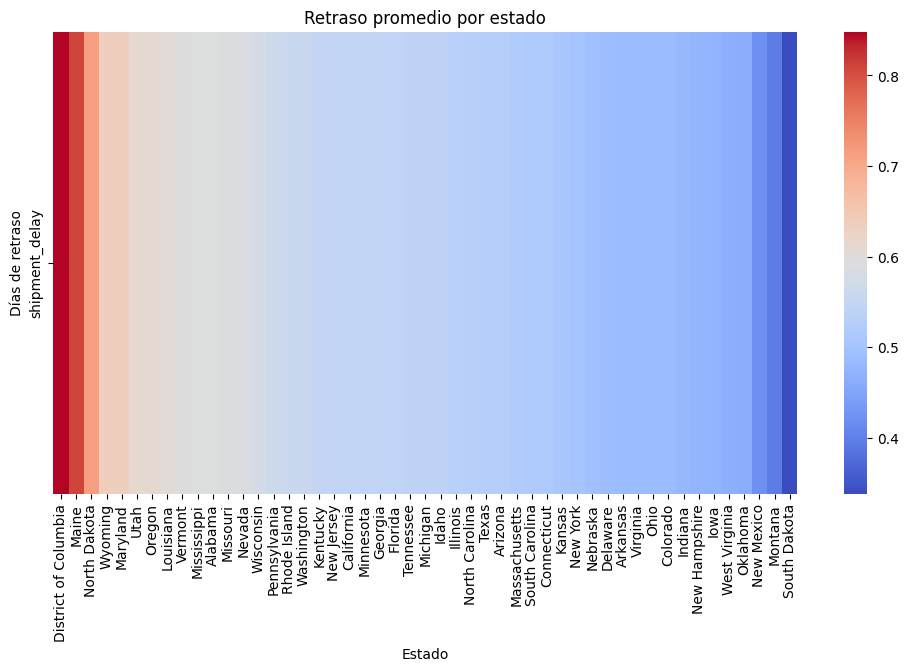

In [9]:
plt.figure(figsize=(12, 6))
heatmap_data = data_commerce.groupby('customer_state')['shipment_delay'].mean().reset_index()
heatmap_data = heatmap_data.sort_values(by='shipment_delay', ascending=False)

sns.heatmap(heatmap_data.set_index('customer_state').T, cmap='coolwarm', annot=False)
plt.title('Retraso promedio por estado')
plt.xlabel('Estado')
plt.ylabel('Días de retraso')
plt.show()

Los estados con mayores retrasos en la entrega están en tonos rojizos, destacando District of Columbia, Maine y Dakota del Norte. En contraste, los estados con menos retrasos, como South Dakota y Montana, aparecen en tonos azulados. La mayoría de los estados tienen retrasos en un rango intermedio, con una transición gradual de colores. Esto sugiere una variabilidad geográfica en la eficiencia de las entregas.

#### Relación entre el volumen de pedidos y el retraso en la entrega por estado

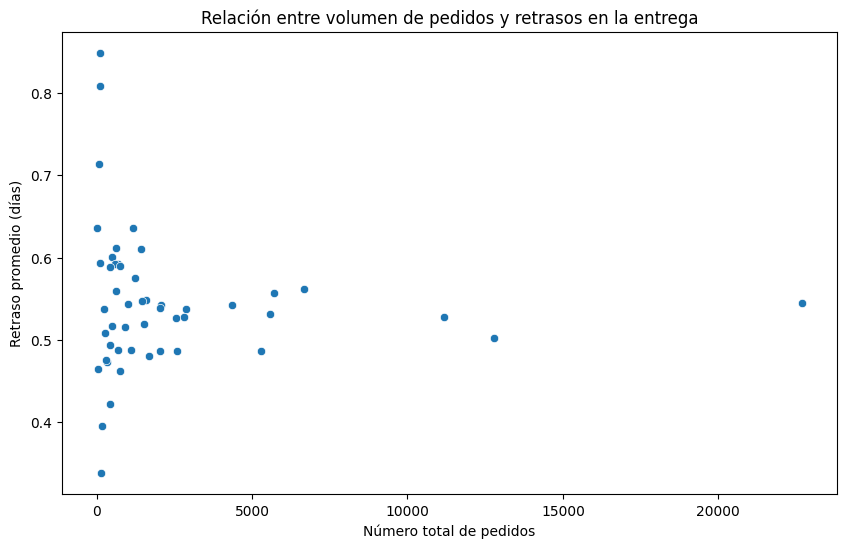

In [10]:
delay_by_state = data_commerce.groupby('customer_state').agg(
    total_orders=('order_id', 'count'),
    avg_delay=('shipment_delay', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=delay_by_state, x='total_orders', y='avg_delay')

plt.xlabel("Número total de pedidos")
plt.ylabel("Retraso promedio (días)")
plt.title("Relación entre volumen de pedidos y retrasos en la entrega")

plt.show()

El grafico muestra la relacion entre el numero total de pedidos y el retraso promedio en la entrega. Se observa que la mayoria de los puntos se agrupan en volumenes entre 0.4 y 0.7 dias. A medida que el volumen de pedidos aumenta , hay menos datos, pero los retrasos no aparecen aumentar significativamente. No se aprecia una relacion clara entre un mayor numero de pedidos y un aumento de retrasos.

### Definir la hipotesis 

Hipótesis nula (H0): No existe diferencia significativa entre los tiempos de entrega programados y los tiempos de entrega reales.

Hipótesis alternativa (H1): Existe una diferencia significativa entre los tiempos de entrega programados y los tiempos de entrega reales.

Se va a utilizar una prueba t de Student para comparar las medias de los dos grupos (tiempos programados vs. tiempos reales de entrega). Esto nos permitirá determinar si hay una diferencia significativa entre ellos.

In [22]:
# Realizar la prueba t de Student para comparar las medias de los tiempos programados y reales
t_stat, p_value = stats.ttest_ind(data_commerce['days_for_shipment_scheduled'], data_commerce['days_for_shipment_real'])

# Mostrar los resultados
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Evaluar el resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los tiempos reales de entrega son significativamente mayores que los programados.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa entre los tiempos reales y programados.")

T-statistic: -83.99825349405607
P-value: 0.0
Rechazamos la hipótesis nula: Los tiempos reales de entrega son significativamente mayores que los programados.


Los resultados de la prueba t muestran que los tiempos reales de entrega son significativamente mayores que los programados, lo que indica retrasos en el proceso logístico. Esto sugiere la necesidad de optimizar la gestión de envíos para mejorar la eficiencia.

### Conclusiones Generales

Retrasos en los tiempos de entrega 📦⏱️:
Los tiempos de entrega reales presentan retrasos significativos respecto a los tiempos programados. Se observa una mayor dispersión en los tiempos reales de entrega, con un pico en el día 4 que sugiere una concentración de entregas programadas, mientras que las entregas reales están más distribuidas. Esto indica que existen ineficiencias logísticas que afectan la experiencia del cliente, lo que requiere una optimización en la planificación de envíos. Al realizar la prueba de hipótesis, se rechazó la hipótesis nula (H0), confirmando que los tiempos de entrega reales son significativamente mayores que los programados.

Variabilidad geográfica y en las categorías de productos 🌍📦:
Se observa una variabilidad en los retrasos dependiendo de la ubicación geográfica. Los estados como District of Columbia, Maine y Dakota del Norte presentan los mayores retrasos, mientras que South Dakota y Montana tienen retrasos menores. Además, las entregas en las categorías "Office Supplies", "Furniture" y "Technology" generalmente se completan a tiempo, aunque algunos pedidos presentan retrasos significativos. Esto refuerza la hipótesis alternativa (H1), indicando que factores como la ubicación geográfica y la categoría del producto pueden influir en los retrasos.

Relación entre el volumen de pedidos y los retrasos 📊❌:
No se encontró una relación clara entre el aumento del volumen de pedidos y el incremento de los retrasos en las entregas. Aunque algunos puntos indican un aumento en el volumen de pedidos, los retrasos no muestran una tendencia consistente. Esto sugiere que otros factores, como la eficiencia en la logística o la ubicación, tienen un mayor impacto en los retrasos que el volumen de pedidos en sí. Esto se alinea con la hipótesis nula (H0), ya que no hay evidencia suficiente para afirmar que el volumen de pedidos esté directamente relacionado con los retrasos.